In [8]:
import pandas as pd
import numpy as np

Comments = pd.read_csv("Comments.csv")
Posts = pd.read_csv("Posts.csv")
Users = pd.read_csv("Users.csv")


### Zadanie 1
Narysuj histogram liczby odpowiedzi (Comments) na post.

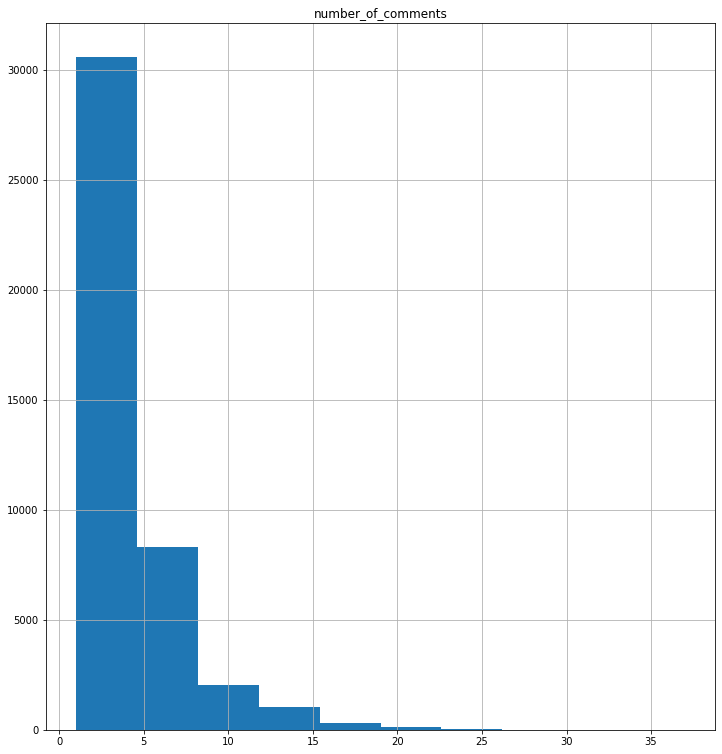

In [16]:
Com1 = Comments.groupby('PostId')\
        .count()\
        .reset_index()\
        .rename(columns={'Id': 'number_of_comments'})\
        .drop(['CreationDate','Score','UserId'], axis=1)\
        .hist('number_of_comments', figsize=(12, 13))



### Zadanie 2

Wypisz nazwę (DisplayName, nie Id!) użytkownika, dla którego suma wyświetleń jego postów jest największa. Wskazówka: aby wyciągnąć odpowiedni OwnerUserId z Posts można użyć .loc, .iloc lub .values.

In [10]:
Best = Posts.groupby('OwnerUserId')\
        .sum()['ViewCount']\
        .reset_index()\
        .sort_values(by='ViewCount', ascending=False).head(1)
        

Users[Users["Id"] == Best.iloc[0,0]].iloc[0, 3]

'Mark Mayo'

### Zadanie 3

Wyświetl nazwę użytkownika, który ma drugą największą liczbę odpowiedzi (również znajdujących się w ramce Posts) oznaczonych jako zaakceptowane rozwiązanie.


In [11]:
posts1 = Posts[["AcceptedAnswerId", "Id", "ParentId", "OwnerUserId"]]
Ind = posts1.merge(posts1[["OwnerUserId", "Id"]], how = "left", left_on = "AcceptedAnswerId", right_on = "Id")\
        .rename(columns={'OwnerUserId_y': 'OwnerUserId'})\
        .groupby(['OwnerUserId'])\
        .count()\
        .reset_index()\
        .sort_values(by='AcceptedAnswerId', ascending =False)\
        .iloc[1,0]

Users[Users["Id"] == Ind]["DisplayName"].iloc[0]

'jpatokal'

### Zadanie 4

Wyświetl odsetek postów, dla których odpowiedź zaakceptowana ma niższy wynik niż odpowiedź o najwyższym wyniku.

In [12]:
posts2 = Posts[["AcceptedAnswerId", "AnswerCount", "Id", "ParentId", "PostTypeId", "Score"]]

posts3 = posts2.merge(posts2[["Id", "Score"]], how = "left", left_on = "AcceptedAnswerId", right_on = "Id")\
        .rename(columns={'Score_y': 'Punkty_zaakceptowanej'})

posts4 = posts2.groupby('ParentId')\
        .max()['Score']\
        .reset_index()\
        .rename(columns={'Score':'Najlepiej_oceniona'})

posts5 = posts3.merge(posts4[["ParentId", "Najlepiej_oceniona"]], how = "left", left_on = "Id_x", right_on = "ParentId")

## Rozpatrujemy jako odsetek wszystkich postow, nawet tych ktore nie byly pytaniami; w procentach
a = len(posts5[posts5['Najlepiej_oceniona']>posts5['Punkty_zaakceptowanej']])
b = len(posts5)
a/b*100

1.4394369709480335

In [13]:
## Jako odsetek postow, dla ktorych odpowiedz zaakceptowana istniala; w procentach

m = min(Posts["Score"]) 
c = len(posts5[posts5["Punkty_zaakceptowanej"] > m-1])
a/c*100

9.044220055710305

In [14]:
## Jako odstetek postow, ktore byly pytaniami; w procentach

a/len(Posts[Posts["PostTypeId"]==1])*100

4.099266156395486